<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/UAS/02_pytorch_classification_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Muhammad Yuzzaf Ibrahim Azzumarafi**

**NIM: 1103200082**

**UAS**

#**02. PyTorch Neural Network Classification**

###Exercise 1: Make a binary classification dataset

In [21]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch

# Set seed for reproducibility
torch.manual_seed(42)

# Create a binary classification dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Convert data to PyTorch tensors
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).view(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Exercise 2: Build a model

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Create an instance of the model
model = CustomModel()


###Exercise 3: Setup loss function and optimizer

In [23]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


###Exercise 4: Training loop

In [24]:
pip install torchmetrics

In [25]:
import torchmetrics

# Assuming you have model, X_test, and y_test from the previous exercises

# Create an instance of the accuracy metric
accuracy_metric = torchmetrics.Accuracy(task='binary')  # For binary classification

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    y_pred = model(X_test)

# Calculate accuracy
accuracy = accuracy_metric(y_pred, y_test)
print(f'Accuracy: {accuracy.item():.4f}')


Accuracy: 0.2850


###Exercise 5: Make predictions and plot decision boundary

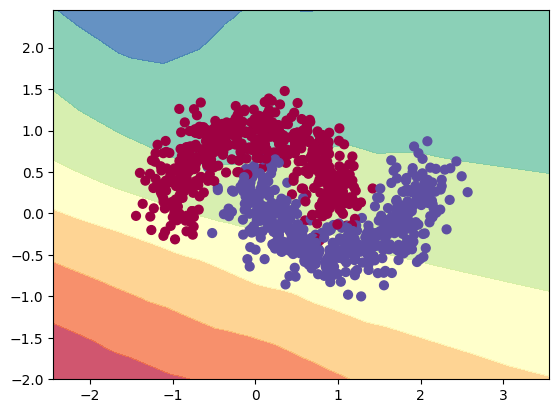

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])).detach().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

# Plot decision boundary
model.eval()
plot_decision_boundary(model, X.numpy(), y.numpy())


###Exercise 6: Replicate the Tanh activation function

In [27]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Test the tanh function
x = torch.tensor([1.0, 2.0, 3.0])
print(tanh(x))


tensor([0.7616, 0.9640, 0.9951])


###Exercise 7: Create a multi-class dataset and train a model

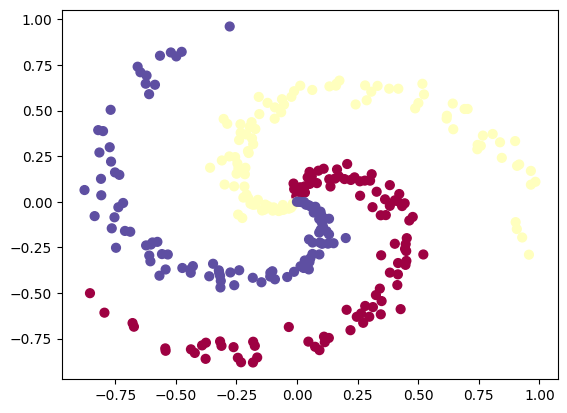

In [30]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

criterion_spiral = nn.CrossEntropyLoss()

def train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_epochs=300):
    for epoch in range(1, num_epochs + 1):
        # Training
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Testing every 10 epochs
        if epoch % 10 == 0:
            model.eval()
            with torch.no_grad():
                _, predicted = torch.max(outputs, 1)
                train_acc = accuracy_metric(predicted, y_train)
                test_outputs = model(X_test)
                _, predicted_test = torch.max(test_outputs, 1)
                test_acc = accuracy_metric(predicted_test, y_test)

                print(f'Epoch {epoch}/{num_epochs}, '
                      f'Train Loss: {loss.item():.4f}, '
                      f'Train Acc: {train_acc.item():.4f}, '
                      f'Test Acc: {test_acc.item():.4f}')
